### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Huperparameter Tuning
- ANN- Artificial Neural Network

### This Part Remains Same Importing, Cleaning

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df=pd.read_csv('Data/Final_Data/final_combine.csv')

In [53]:
df.head()

T    TM    Tm     H   VV     V    VM      PM 2.5
0   8.9  15.0   5.0  93.0  0.5   4.8  11.1  284.795833
1   6.6  10.0   3.0  99.0  0.6   8.1  13.0  182.187500
2   7.8  14.0   3.0  79.0  1.6  11.7  18.3  223.208333
3  13.4  29.0   7.0  55.0  2.4  11.9  22.2  200.645833
4  15.2  21.0  10.0  88.0  0.6   8.9  18.3  285.225000

<AxesSubplot: >

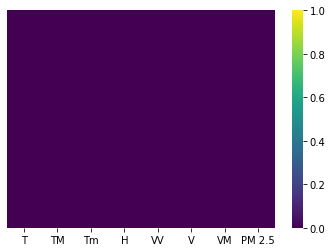

In [54]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [55]:
# dropping null
df=df.dropna()

In [56]:
X=df.iloc[:,:-1] ## independent features [ full , start:last]
y=df.iloc[:,-1] ## dependent features [ full, only last]

In [57]:
## check null values
X.isnull()

T     TM     Tm      H     VV      V     VM
0     False  False  False  False  False  False  False
1     False  False  False  False  False  False  False
2     False  False  False  False  False  False  False
3     False  False  False  False  False  False  False
4     False  False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...    ...
1102  False  False  False  False  False  False  False
1103  False  False  False  False  False  False  False
1104  False  False  False  False  False  False  False
1105  False  False  False  False  False  False  False
1106  False  False  False  False  False  False  False

[1105 rows x 7 columns]

In [58]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1102    False
1103    False
1104    False
1105    False
1106    False
Name: PM 2.5, Length: 1105, dtype: bool

#### Pair plot to see plot so we can see basic trends between all the Parameters.

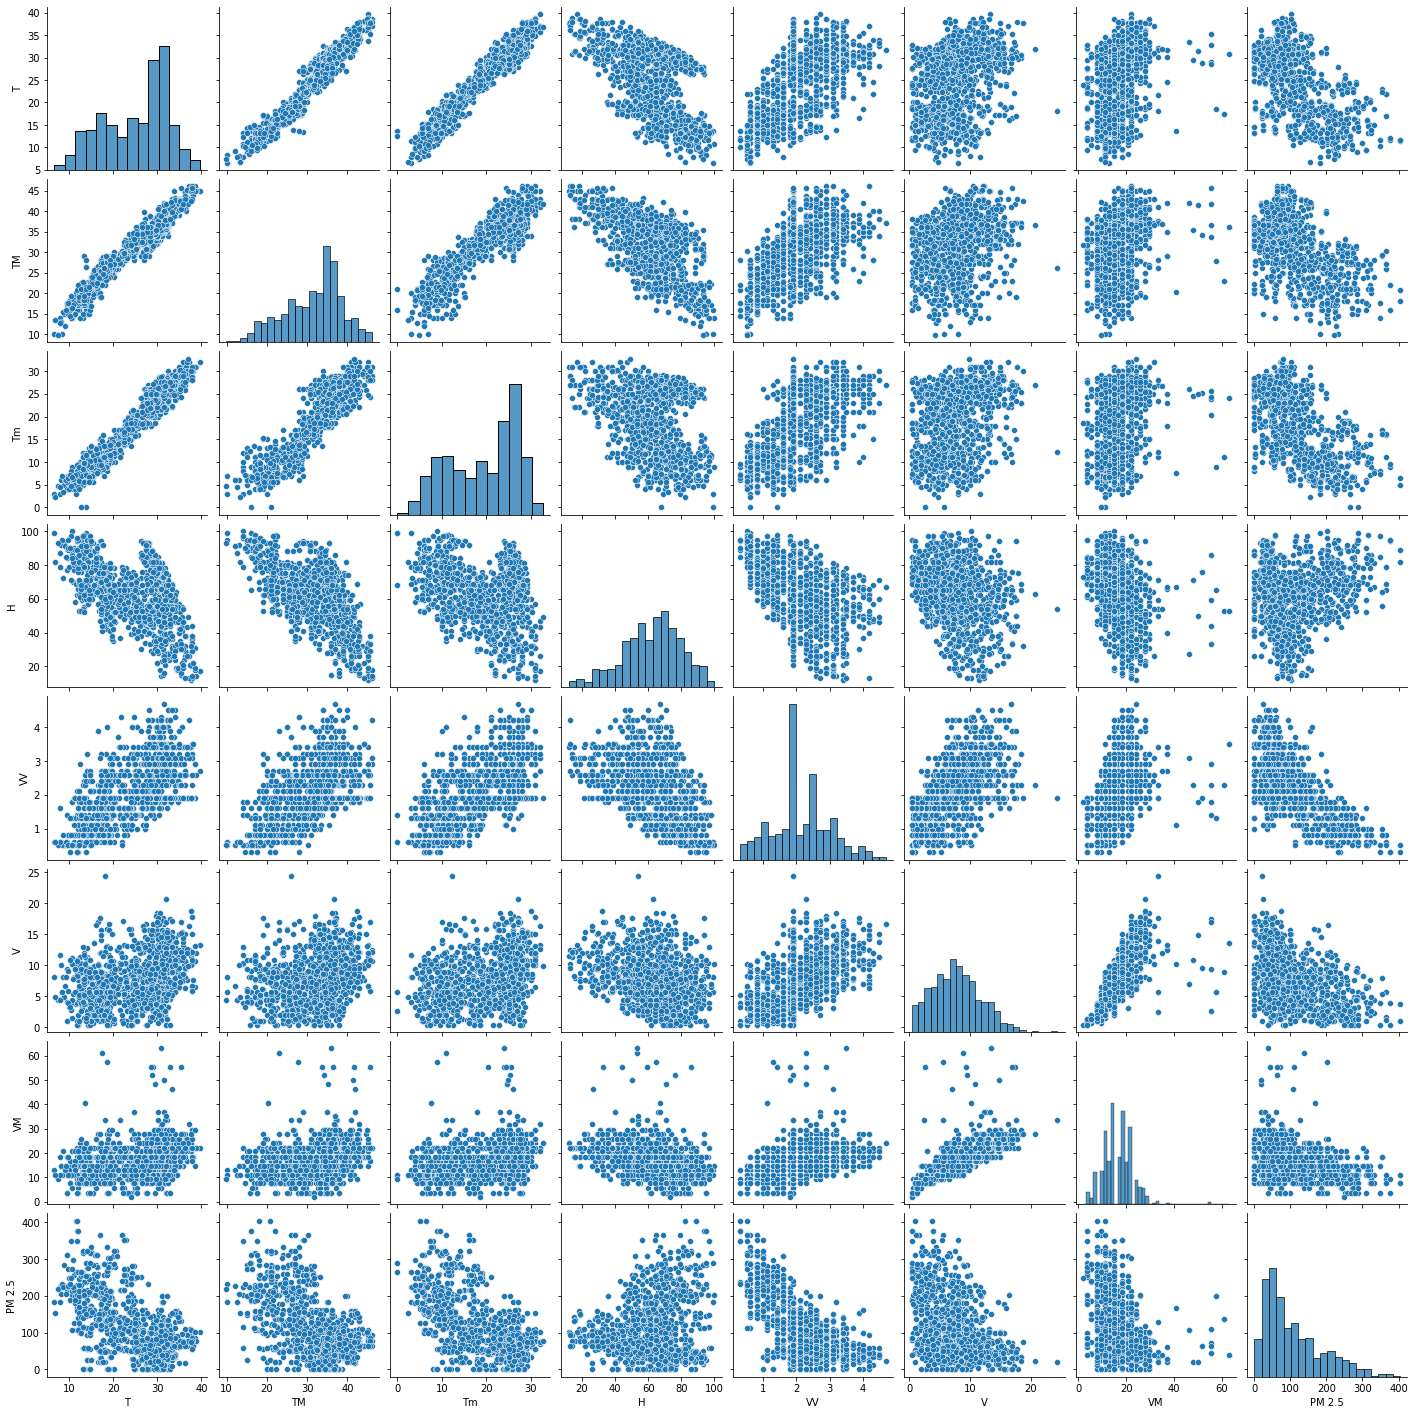

In [59]:
sns.pairplot(df)

In [60]:
df.corr()

T        TM        Tm         H        VV         V        VM  \
T       1.000000  0.965960  0.963751 -0.508524  0.577169  0.326493  0.275799   
TM      0.965960  1.000000  0.890627 -0.597787  0.532991  0.279156  0.270378   
Tm      0.963751  0.890627  1.000000 -0.326634  0.551675  0.335655  0.252150   
H      -0.508524 -0.597787 -0.326634  1.000000 -0.466681 -0.305809 -0.327529   
VV      0.577169  0.532991  0.551675 -0.466681  1.000000  0.536275  0.411468   
V       0.326493  0.279156  0.335655 -0.305809  0.536275  1.000000  0.729656   
VM      0.275799  0.270378  0.252150 -0.327529  0.411468  0.729656  1.000000   
PM 2.5 -0.618661 -0.555090 -0.655253  0.156061 -0.651973 -0.447076 -0.353728   

          PM 2.5  
T      -0.618661  
TM     -0.555090  
Tm     -0.655253  
H       0.156061  
VV     -0.651973  
V      -0.447076  
VM     -0.353728  
PM 2.5  1.000000

### Correlation Matrix with Heatmap
#### Similar to corr but just ploted it using sns
Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

Index(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


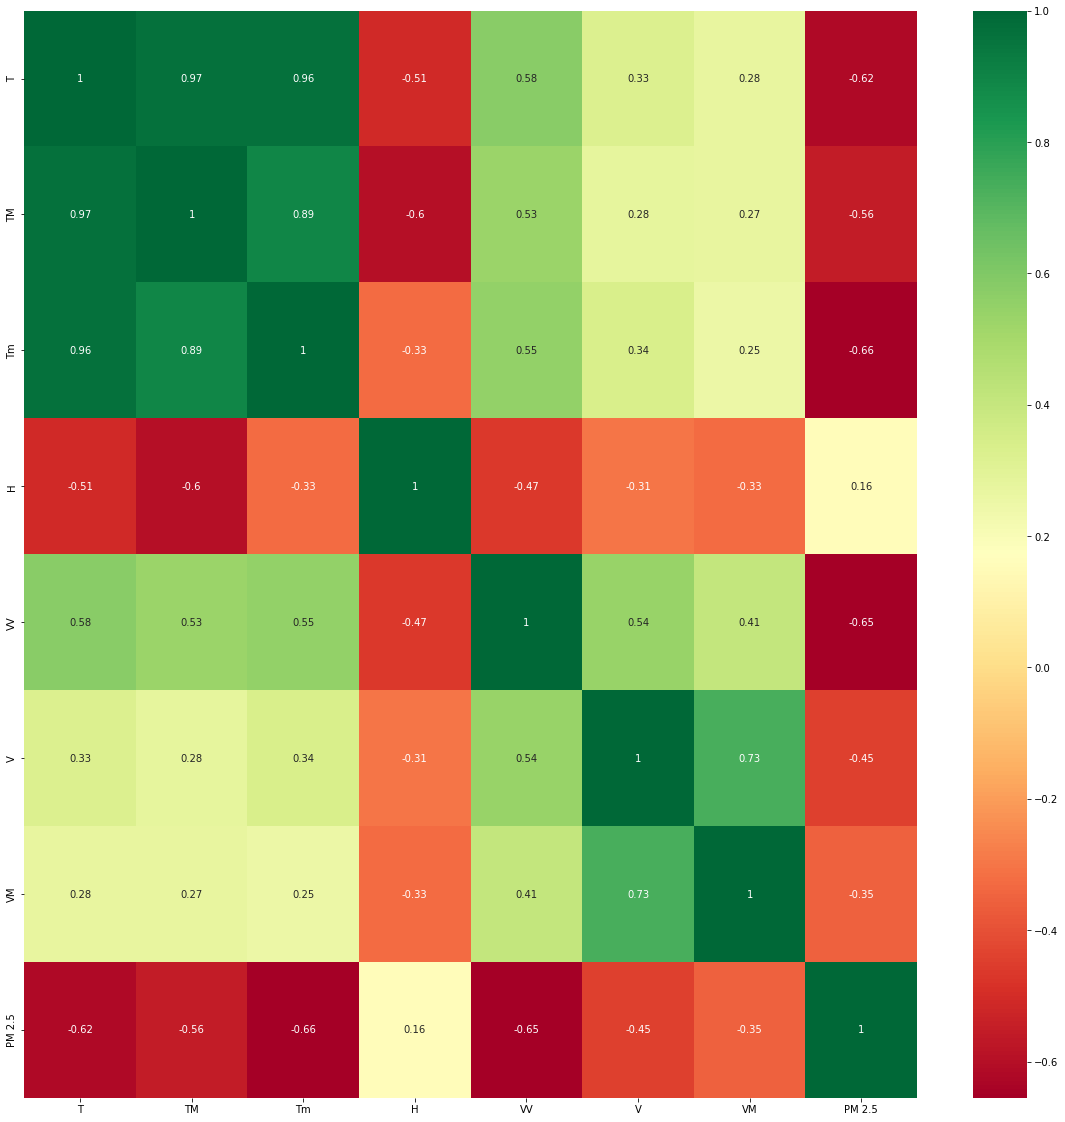

In [61]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
print(top_corr_features)
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [62]:
corrmat.index

Index(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [63]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [64]:
X.head()

T    TM    Tm     H   VV     V    VM
0   8.9  15.0   5.0  93.0  0.5   4.8  11.1
1   6.6  10.0   3.0  99.0  0.6   8.1  13.0
2   7.8  14.0   3.0  79.0  1.6  11.7  18.3
3  13.4  29.0   7.0  55.0  2.4  11.9  22.2
4  15.2  21.0  10.0  88.0  0.6   8.9  18.3

In [65]:
print(model.feature_importances_)

[0.15343687 0.11328733 0.21412922 0.08628445 0.32571208 0.06689117
 0.04025888]


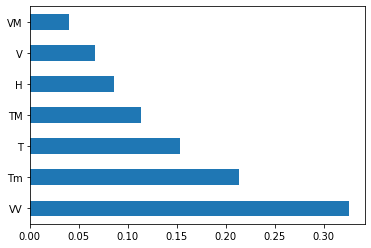

In [66]:
#ploting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\805ka\AppData\Local\Temp\ipykernel_4856\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<AxesSubplot: xlabel='PM 2.5', ylabel='Density'>

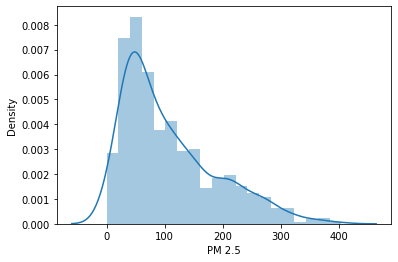

In [67]:
sns.distplot(y)

### Decision Tree Regressor

C:\Users\805ka\AppData\Local\Temp\ipykernel_4856\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<AxesSubplot: xlabel='PM 2.5', ylabel='Density'>

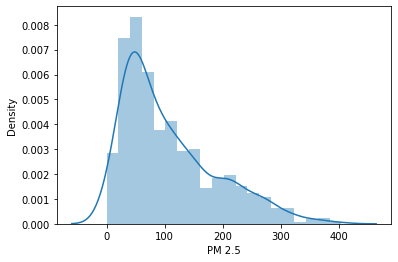

In [68]:
sns.distplot(y)

### Train Test split

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Importing

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
dtree=DecisionTreeRegressor(criterion="mse")

In [72]:
dtree.fit(X_train,y_train)

c:\Users\805ka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [73]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [74]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.4769671423903151


In [75]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

c:\Users\805ka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\805ka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\805ka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\805ka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='sq

In [76]:
score.mean()

0.440725157794302

### Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [77]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO 

In [78]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM']

In [79]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
# Installed https://graphviz.org/download/
# also put copy of installed files from C:\Program Files\Graphviz
# to C:\Program Files (x86)\Graphviz
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.792814 to fit



### Model Evaluation

In [80]:
prediction=dtree.predict(X_test)

C:\Users\805ka\AppData\Local\Temp\ipykernel_4856\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<AxesSubplot: xlabel='PM 2.5', ylabel='Density'>

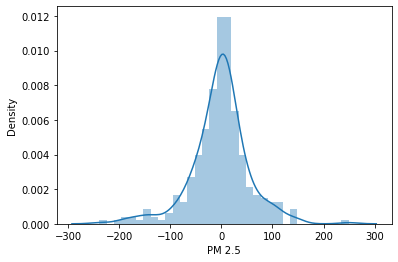

In [81]:
sns.distplot(y_test-prediction)

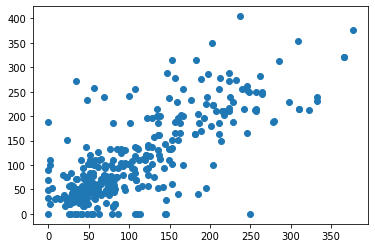

In [82]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning Decision Tree Regressor

In [83]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [84]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [85]:
# Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [86]:

random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [87]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [88]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


c:\Users\805ka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\805ka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(



 Time taken: 0 hours 3 minutes and 58.09 seconds.


In [89]:
random_search.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [90]:
random_search.best_score_

-2699.3542011325553

In [91]:
predictions=random_search.predict(X_test)

C:\Users\805ka\AppData\Local\Temp\ipykernel_4856\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<AxesSubplot: xlabel='PM 2.5', ylabel='Density'>

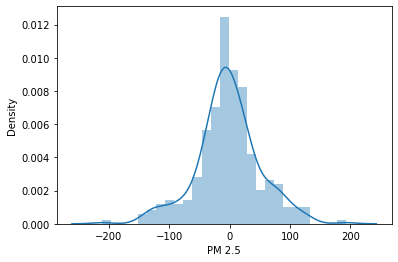

In [92]:
sns.distplot(y_test-predictions)

#### Errors in Random Search Desicion Regression : RMSE, MSE, MAE

In [93]:
from sklearn import metrics

In [94]:
# predictions=random_search.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 38.86223183899056
MSE: 2829.667745453093
RMSE: 53.19462139589954


Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in Independent Featue is associated with an increase / decrease of VALUE in AQI PM2.5.
- Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 2.690 in AQI PM2.5.
- Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 0.46 in AQI PM 2.5.


### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

#### Errors in Desicion Regression : RMSE, MSE, MAE

In [95]:
# prediction=dtree.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 38.94583333333333
MSE: 3268.1909399054553
RMSE: 57.16809372285782


### Saving Random Search Decision Regression Model

In [96]:
import pickle 

In [97]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)

#### We are done with Decision Regression and also created Model for same.